In [1]:
!pip install pyathena pandas seaborn matplotlib scipy

In [8]:
df = pd.read_csv('robotic_task_logs (3).csv')

In [9]:
# Shape and column types
print(" Data Shape:", df.shape)
print("\n Column Info:")
print(df.info())

# Sample rows
df.sample(5)


 Data Shape: (5000, 8)

 Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   robot_id        5000 non-null   object 
 1   task_type       5000 non-null   object 
 2   algorithm       5000 non-null   object 
 3   start_time      5000 non-null   object 
 4   end_time        5000 non-null   object 
 5   duration_min    5000 non-null   float64
 6   error_occurred  5000 non-null   int64  
 7   energy_kwh      5000 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 312.6+ KB
None


,robot_id,task_type,algorithm,start_time,end_time,duration_min,error_occurred,energy_kwh
1947,R0064,pick,B,2025-01-23T09:25:00,2025-01-23T09:51:03.960500,26.07,0,12.38
4822,R0020,pick,B,2025-02-26T21:31:00,2025-02-26T22:04:57.053719,33.95,0,9.95
4392,R0051,place,A,2025-01-14T02:11:00,2025-01-14T02:35:20.816423,24.35,0,9.42
1490,R0037,move,A,2025-01-24T07:30:00,2025-01-24T08:04:33.549534,34.56,0,10.66
3251,R0010,place,B,2025-01-04T22:03:00,2025-01-04T22:28:47.591944,25.79,0,12.76


In [12]:
# Missing values check
print("\n Missing Values:")
print(df.isnull().sum())

# Summary statistics
print("\n Summary Statistics:")
print(df.describe())



 Missing Values:
robot_id          0
task_type         0
algorithm         0
start_time        0
end_time          0
duration_min      0
error_occurred    0
energy_kwh        0
dtype: int64

 Summary Statistics:
       duration_min  error_occurred   energy_kwh
count   5000.000000     5000.000000  5000.000000
mean      28.956028        0.041600    11.597690
std        4.894501        0.199693     2.045183
min        9.680000        0.000000     3.690000
25%       25.650000        0.000000    10.210000
50%       28.960000        0.000000    11.620000
75%       32.252500        0.000000    12.990000
max       44.590000        1.000000    18.800000


In [13]:
# Check counts for each algorithm
print("\n Task Distribution by Algorithm:")
print(df['algorithm'].value_counts())



 Task Distribution by Algorithm:
algorithm
A    2510
B    2490
Name: count, dtype: int64


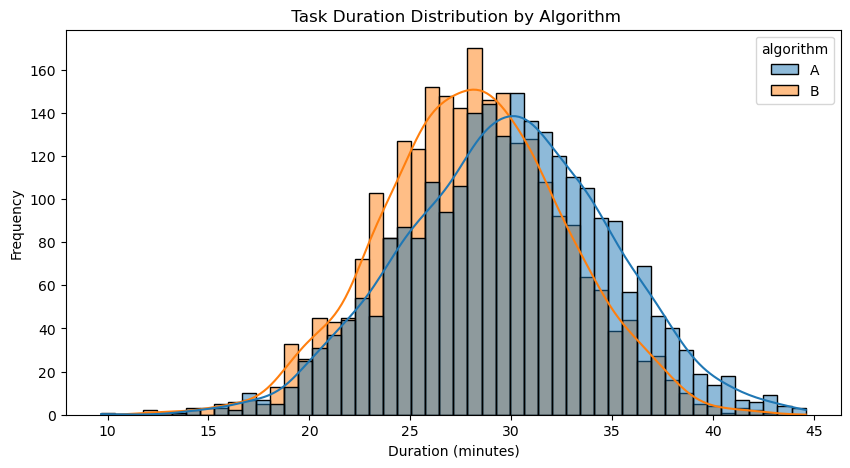

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='duration_min', hue='algorithm', kde=True, bins=50)
plt.title(" Task Duration Distribution by Algorithm")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()


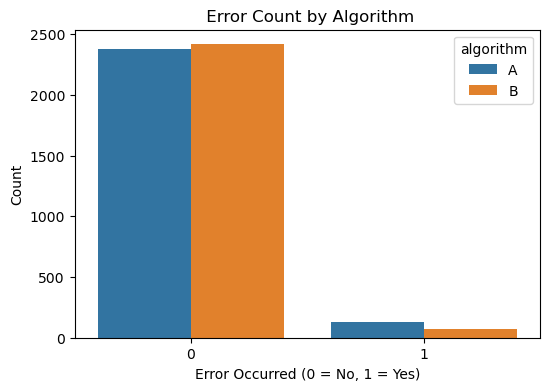

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='error_occurred', hue='algorithm')
plt.title(" Error Count by Algorithm")
plt.xlabel("Error Occurred (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


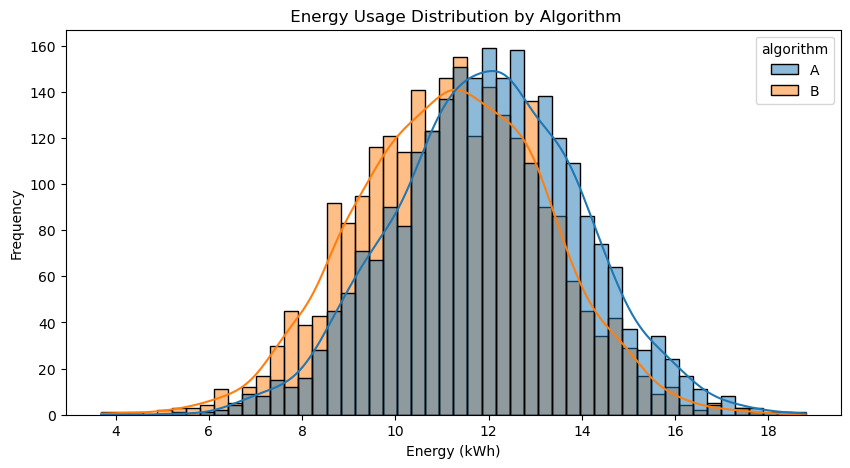

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='energy_kwh', hue='algorithm', kde=True, bins=50)
plt.title(" Energy Usage Distribution by Algorithm")
plt.xlabel("Energy (kWh)")
plt.ylabel("Frequency")
plt.show()


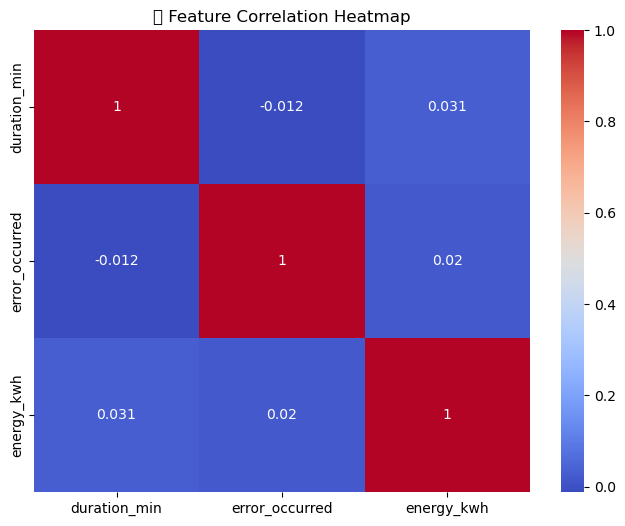

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['duration_min', 'error_occurred', 'energy_kwh']].corr(), annot=True, cmap="coolwarm")
plt.title("🔗 Feature Correlation Heatmap")
plt.show()


In [22]:
from scipy.stats import ttest_ind

# Split data
duration_a = df[df['algorithm'] == 'A']['duration_min']
duration_b = df[df['algorithm'] == 'B']['duration_min']

# T-test (Welch’s t-test for unequal variance)
t_stat, p_val = ttest_ind(duration_a, duration_b, equal_var=False)

print(f" Task Duration T-Test:\nT-statistic = {t_stat:.4f}, P-value = {p_val:.4f}")

if p_val < 0.05:
    print(" Statistically significant difference in task duration between A and B.")
else:
    print(" No statistically significant difference in task duration.")


 Task Duration T-Test:
T-statistic = 12.6379, P-value = 0.0000
 Statistically significant difference in task duration between A and B.


In [24]:
import scipy.stats as stats
import pandas as pd

# Contingency table
error_table = pd.crosstab(df['algorithm'], df['error_occurred'])

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(error_table)

print("\n Error Rate Chi-Square Test:")
print("Chi2 Statistic =", chi2)
print("P-value =", p)

if p < 0.05:
    print(" Statistically significant difference in error rates.")
else:
    print(" No statistically significant difference in error rates.")



 Error Rate Chi-Square Test:
Chi2 Statistic = 15.826129999895842
P-value = 6.943694324897344e-05
 Statistically significant difference in error rates.


In [27]:
energy_a = df[df['algorithm'] == 'A']['energy_kwh']
energy_b = df[df['algorithm'] == 'B']['energy_kwh']

t_stat_energy, p_val_energy = ttest_ind(energy_a, energy_b, equal_var=False)

print(f"\n Energy Usage T-Test:\nT-statistic = {t_stat_energy:.4f}, P-value = {p_val_energy:.4f}")

if p_val_energy < 0.05:
    print(" Statistically significant difference in energy usage between A and B.")
else:
    print(" No statistically significant difference in energy usage.")



 Energy Usage T-Test:
T-statistic = 13.8764, P-value = 0.0000
 Statistically significant difference in energy usage between A and B.


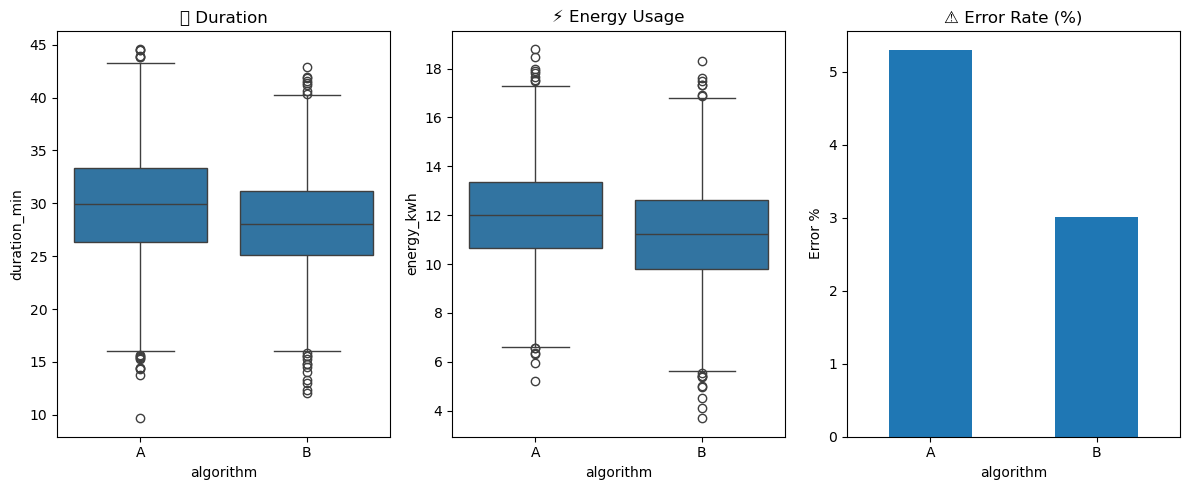

In [26]:
# Combined boxplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='algorithm', y='duration_min')
plt.title('⏱️ Duration')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='algorithm', y='energy_kwh')
plt.title('⚡ Energy Usage')

plt.subplot(1, 3, 3)
error_rate = df.groupby('algorithm')['error_occurred'].mean() * 100
error_rate.plot(kind='bar', title='⚠️ Error Rate (%)', ylabel='Error %', rot=0)

plt.tight_layout()
plt.show()


# Conclusion

Algorithm B outperformed Algorithm A across all critical metrics. It resulted in faster task completion, reduced error rates, and lower energy consumption — with all differences statistically significant (p < 0.05). Based on these results, Algorithm B is recommended for deployment in production robotic systems.